#Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('/content/haberman.csv')

##Meta Data

In [5]:
df.shape

(305, 4)

In [6]:
df.columns=['Age','OP_Year','axil_nodes','Surv_status']

In [7]:
df.columns

Index(['Age', 'OP_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [8]:
df.head()

,Age,OP_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          305 non-null    int64
 1   OP_Year      305 non-null    int64
 2   axil_nodes   305 non-null    int64
 3   Surv_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
df['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

###Dataset  is imbalanced

#Unvarite Analysis

##PDF

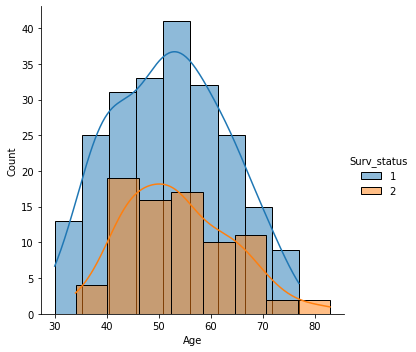

In [26]:
sns.FacetGrid(df,hue='Surv_status',height=5).map(sns.histplot,"Age",kde=True).add_legend()

###Observation


*   Most of them are overlap 
*   most of them are survived



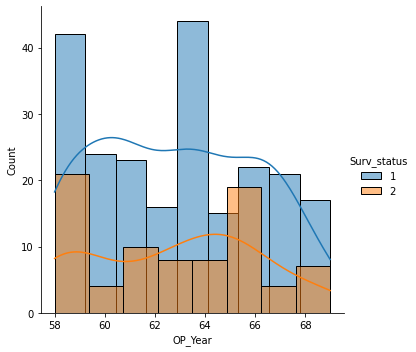

In [24]:
sns.FacetGrid(df,hue="Surv_status",height=5).map(sns.histplot,"OP_Year",kde=True).add_legend()

###Observation 
*  Overlap
*  Lot of them dead at 1964 to 1966

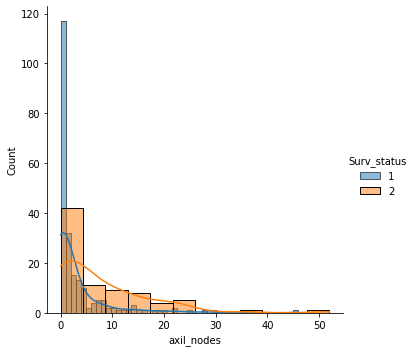

In [27]:
sns.FacetGrid(df,hue="Surv_status",height=5).map(sns.histplot,"axil_nodes",kde=True).add_legend()
plt.show()

###Observation
*  people have more chance to survive at 0 to 2 node
*  Increase of node leds lesser life span

##CDF

[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


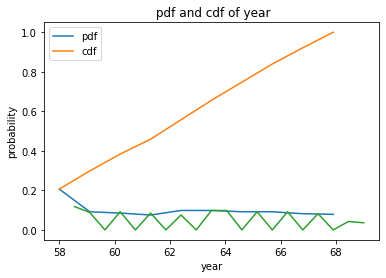

In [44]:
plt.title(' pdf and cdf of year')

counts,bin_edges=np.histogram(df['OP_Year'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges);
cdf=(np.cumsum(pdf))
plt.plot(bin_edges[:-1],pdf);
plt.plot(bin_edges[:-1],cdf);


counts,bin_edges=np.histogram(df['OP_Year'],bins=20,density=True)
print(pdf)
print(bin_edges);
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf);
plt.xlabel('year')
plt.legend(['pdf','cdf'])
plt.ylabel('probability')

plt.show();

###Observation
*   as year goes on it affect smaller amount only

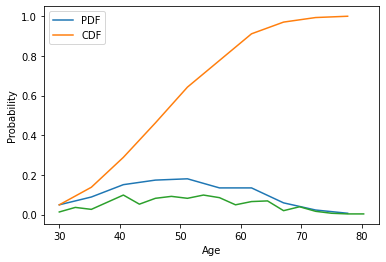

In [46]:
counts , bin_edges = np.histogram(df['Age'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1],pdf)
plt.plot(bin_edges[:-1],cdf)


counts , bin_edges = np.histogram(df['Age'],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1],pdf)

plt.legend(["PDF","CDF"])
plt.xlabel("Age")
plt.ylabel("Probability")
plt.show()

###Observation 
*   High Chance of survival between 45 to 55

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


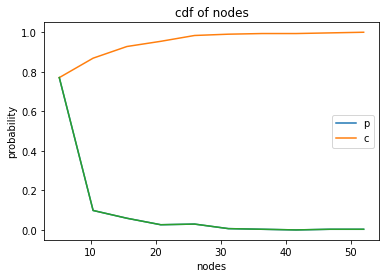

In [49]:
plt.title( 'cdf of nodes') 

counts,bin_edges=np.histogram(df['axil_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
counts,bin_edges=np.histogram(df['axil_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf);
plt.xlabel('nodes')
plt.legend('pc')
plt.ylabel('probability')
plt.show();

###Observation
*  Node less than 10 have high probability of survival

##BOXPLOT

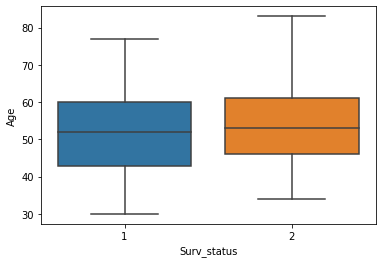

In [51]:
sns.boxplot(x='Surv_status',y='Age',data=df)
plt.show()

###Observation
*  Most are survived between 40 and 50

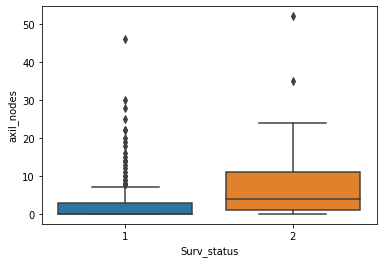

In [53]:
sns.boxplot(x='Surv_status',y='axil_nodes',data=df)
plt.show()

###Observation
*  people are high chance survived if he or she has less nodes

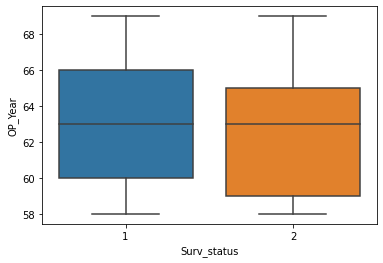

In [54]:
sns.boxplot(x='Surv_status',y='OP_Year',data=df)

##VIOLIN PLOT 

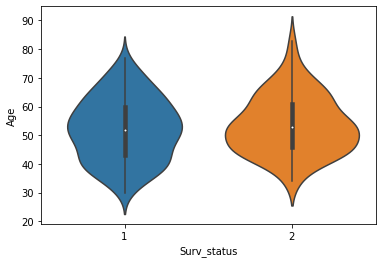

In [56]:
sns.violinplot(x='Surv_status',y='Age',data=df)
plt.show()

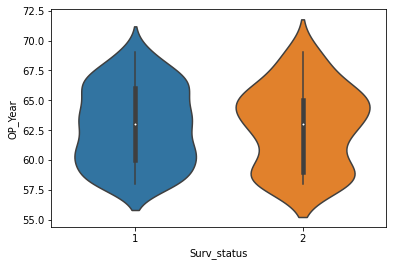

In [59]:
sns.violinplot(x='Surv_status',y='OP_Year',data=df)
plt.show()

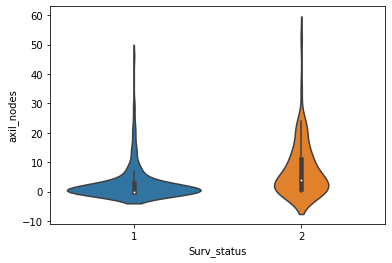

In [60]:
sns.violinplot(x='Surv_status',y='axil_nodes',data=df)
plt.show()

#BI VARIANT Analysis

##Scatter Plot

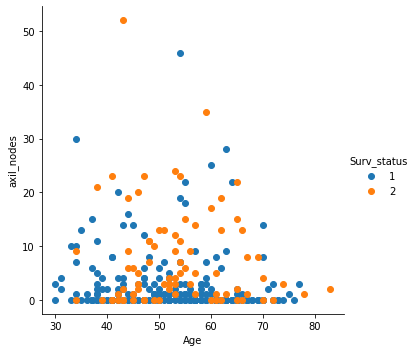

In [61]:
sns.FacetGrid(df,hue='Surv_status',height=5).map(plt.scatter,"Age","axil_nodes").add_legend()
plt.show()

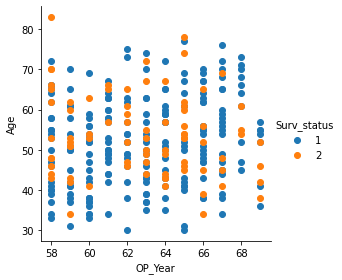

In [63]:
sns.FacetGrid(df,hue='Surv_status',height=4).map(plt.scatter,'OP_Year','Age').add_legend()
plt.show()

##Pairplot

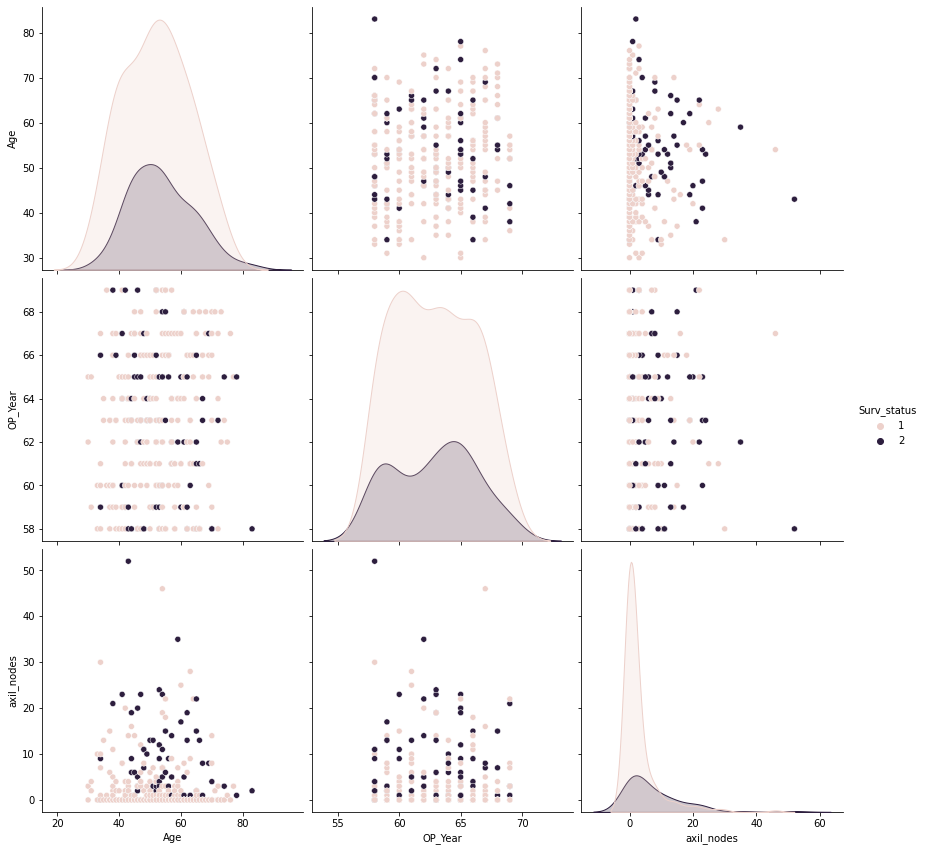

In [65]:
sns.pairplot(df,hue='Surv_status',height=4) 
plt.show()

##Observation
*  Axil_node play an important feature in predicting the survival 
*  Year and Age is less important to determine the survival
*  Less 10 node are higher chances of survival